# LEPL1106, Devoir 6 : filtrage d'un signal audio

## 0) Introduction et objectifs

*Pour améliorer un son qu'il vient de finir, votre artiste favori vous demande de concevoir une fonction qui filtre des signaux audio. Les filtres en question peuvent être passe-bas, passe-haut ou encore passe-bande, selon son envie. On compte sur vous pour l'aider !*

Pour ce devoir, nous allons donc nous intéresser au filtrage de signaux audio. Comme vous le savez, il n'est pas possible de représenter numériquement un signal continu, celui-ci a forcément dû être échantillonné (avec une fréquence d'échantillonnage notée `fech` par la suite). Toutefois, l'objectif de ce devoir est bien de manipuler le concept de filtrage et non celui d'échantillonnage, c'est pourquoi nous vous guiderons tout au long de ce notebook ;-)

Pour créer, stocker, et opérer sur les signaux, on utilisera le package [`NumPy`](http://www.numpy.org/) de Python. Pour manipuler les systèmes, on utilisera le package [`scipy.signal`](https://docs.scipy.org/doc/scipy/reference/signal.html).

In [ ]:
# En cas d'erreur avec scipy, essayez de décommenter la ligne suivante pour mettre à jour le package. 
# Nous vous conseillons une version de scipy supérieure à 1.3.0

#!pip install -U scipy

import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read, write
from scipy import signal

import scipy
print(scipy.__version__) # conseil: supérieure à 1.3.0

## 1) Consignes

### Evaluation

Les critères et modalités d'évaluation sont repris ci-dessous :

- *Respect consignes (1 point)* : Les fonctions ont un docstring et les informations importantes sont présentes en commentaire.
- *Objectifs du devoir atteints (8 points)* : Les fonctions soumises remplissent les objectifs du devoir et passent avec succès des tests simples, moyens et avancé.
- *Forme des figures (1 points)* : Les figures sont complètes; lisibles et compréhensibles. Les éléments suivants sont en outre présents : titre de la figure, labels des axes et unités, absence de fautes d'orthographe (majuscules aux noms propres incluses, e.g., Fourier).

### Deadline 

Le vendredi 5 avril à 20h00. Aucune extension n'est possible, prenez vos dispositions pour soumettre à temps, d'autant plus qu'**il est possible de faire seulement 5 soumissions par heure** (pour ne pas surcharger le serveur). Le debugging doit donc se faire via le Notebook.

### Précision
La remise par deux est autorisée et même encouragée pour peu que

- les deux étudiants soient membres du même groupe de TP ;
- les deux étudiants soient inscrits dans la même team sur la plateforme INGInious.

Questions sur le devoir à adresser au forum des Devoirs (sur Moodle), à votre tuteur/tutrice ou à melanie.ghislain@uclouvain.be.

Bon travail à toutes et à tous !

L'objectif principal de ce devoir est de créer un fonction qui crée un filtre (passe-bas, passe-bande, passe haut autant tous les tester pour découvrir leurs effets!) et de calculer la sortie de celui-ci par la convolution classique. En particulier, nous nous concentrerons sur l'utilisation de filtres Butterworth, Chebyshev I et Chebyshev II pour le traitement de signaux audio.

## Conception et application du filtre

On appelle y la sortie d’un système LIT H et c’est le résultat de la convolution du signal d’entrée x avec la réponse  impulsionnelle h du système. Lorsqu’un système modifie le
contenu fréquentiel du signal d’entrée x, par exemple en supprimant certaines fréquences, on
parle de filtrage. Il existe plusieurs types de filtre (tels que le filtre passe-bas, passe-haut,
passe-bande, etc, voir Figure ci-dessous) qui fonctionnent par la combinaison d’une ou plusieurs « fréquences de
coupure » et d’un « ordre ». C’est à partir de cette fréquence de coupure - ou avant celle-ci,
selon le filtre - que les autres fréquences vont être atténuées et l’ordre va déterminer le nombre
de pôles dans sa fonction de transfert et influer sur son comportement et sa capacité à modifier
les fréquences du signal d’entrée (certains ordres vont mieux "lisser" le signal selon la nature
du filtre par exemple).

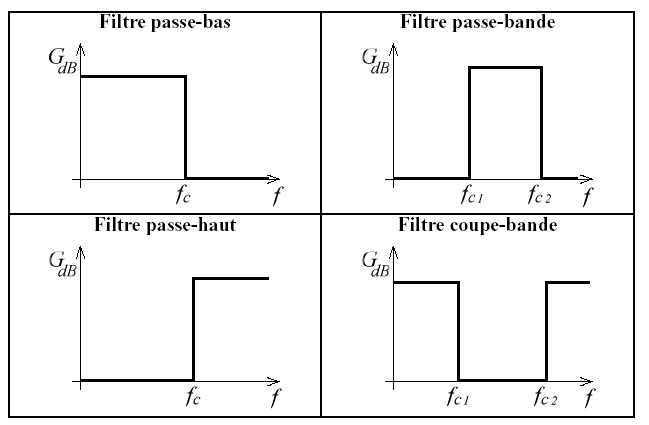

La fonction ``create_applyFilter`` a pour objectif de concevoir et d'appliquer un filtre IIR (Infinite Impulse Response) sur un signal donné. Vous utiliserez les filtres Butterworth, Chebyshev I et Chebyshev II. La fonction permettra également de choisir entre un filtre passe-bas, passe-haut ou passe-bande. Assurez-vous de manipuler correctement les fréquences de coupure et d'observer les effets de ces filtres sur un signal donné.

La fonction `create_applyFilter(inputSignal, filterName, M, cutoff, fech, typeF)` conçoit et applique le filtre IIR choisi (spécifié par l'argument `filterName`) sur le signal `inputSignal` en entrée. `filterName` indiquant le nom du filtre à concevoir et prend ses valeurs dans {'Butterworth','ChebyshevI','ChebyshevII'}. La fonction doit donc pouvoir être appelée avec chacune de ces différentes valeurs (n'hésitez pas à faire un `"if case ... :"` pour chacun). L'argument `inputSignal` est un vecteur (``numpy array``) de longueur $N$ et dont les entrées sont des valeurs réelles. Le support du signal `inputSignal` est donc $\{0,\dots,N-1\}$. L'argument `typeF` est un string indiquant le type de filtre à concevoir. Il prend ses valeurs dans {'lowpass','highpass','bandpass'}. L'argument `M` est un entier strictement positif correspondant à la longueur du filtre à concevoir (càd l'ordre du filtre + 1). Vous pourrez par la suite tester différentes valeurs de ce paramètre. Finalement, l'argument `cutoff` est un scalaire ou un vecteur (`numpy array`) de longueur $2$. Il s'agit de la fréquence de coupure du filtre de votre filtre par rapport à `fs`. Si le filtre est passe-bas ou passe-haut, cette fréquence est un scalaire. Si le filtre est passe-bande, il s'agit d'un vecteur de longueur $2$. 

Pour concevoir ces filtres, vous devez utiliser certaines fonctions telles que `scipy.signal.butter`, `scipy.signal.cheby1`,`scipy.signal.cheby2`. Ces fonctions renvoyent deux vecteurs (`numpy array`) : `a` et `b` qui sont les coefficients du polynôme de la fonction de transfert du filtre dans le domaine fréquentiel.
Remarquez que tout est exprimé en temps discret, vu que nous manipulons un signal continu qui a été échantillonné pour donner un signal discret et qui est filtré en temps discret. Toutefois, pour que `scipy.signal.butter`, `signal.cheby1` et `signal.cheby2` travaillent "comme si on était en temps continu", n'oubliez pas de lui spécifier la période d'échantillonnage (argument `fs`). Dans ce cas, l'argument `cutoff` représente la fréquence de coupure de votre filtre par rapport à `fs`. En outre, l'information du type de filtre à réaliser (passe-bas, passe-haut ou passe-bande) est à donner en argument également. Pour le reste, nous utiliserons les valeurs des paramètres par défaut comme `analog=False` par exemple. Les fonctions `signal.cheby1` et `signal.cheby2` nécessitent un paramètre `rp`et `rs` qui correspondent respectivement au ripple maximum dans la bande de fréquence non-atténué et à l'atténuation minimum dans la bande de fréquence atténuée, tous deux requis en decibels. Libre à vous de faire varier ce paramètre afin d'en observer les conséquences mais il doit être défini à 3 et 20 respectivement pour les fonctions `signal.cheby1` et `signal.cheby2` pour la soumission finale. 

Il vous est demandé de renvoyer ``output`` qui correspond au signal d'entrée ``inputSignal``filtré. Pour le calcul de ce filtrage, vous devez utiliser la fonction `np.convolve` pour effectuer la convolution classique du signal d'entrée avec la réponse impulsionnelle du filtre. Assurez-vous que les dimensions des signaux et des filtres sont compatibles pour effectuer la convolution correctement en jouant avec les paramètres (surtout "mode") de cette fonction qui vont vous permettre d'adapter la taille du signal (ici, on veut avoir un output de la même taille que l'`inputSignal`). Afin d'obtenir la réponse impulsionnelle du filtre donc en temporel, il est recommandé d'utiliser les fonctions ``signal.dlti`` et ``signal.dimpulse`` qui permet de créer un système de filtre discret à partir des coefficients de la fonction de transfert et de calculer la réponse impulsionnelle sur base du système créé respectivement.

La fonction doit également renvoyer ``w`` et ``h`` respectivement les fréquences auxquelles la réponse fréquentielle est calculée en radians/sample et la réponse fréquentielle, en nombre complexe. Pour ce faire la fonction `signal.freqz`peut vous être très utile. La fonction `scipy.signal.freqz` permet de calculer la réponse fréquentielle d'un filtre sur base des coefficients des polynomes de sa fonction de transfert. Faîtes attention aux valeurs renvoyées par `scipy.signal.freqz` ainsi que le domaine de fréquences. En effet, il renverra le spectre sur $[0,f_{s}[$ si l'argument `fs` est spécifié (spécifiez-le!), les autres paramètres étant ceux par défaut. Faites donc attention aux valeurs renvoyées pour l'axe des abscisses `f` obtenues afin de correspondre à ce qui est demandé plus bas, un diagramme de Bode.

In [ ]:
def create_applyFilter(inputSignal, filterName, M, cutoff, fech, typeF):
    
    """
    A COMPLETER
    
    """
    
    # A COMPLETER et modifier (10 lignes environ !)
    
    # Code pour concevoir le filtre selon les paramètres passés en arguments
    
    # Code pour appliquer le filtre a l'input "inputSignal"
    
    # Code pour calculer la réponse en fréquence du filtre
    
    return w,h, output

## Diagramme de Bode du filtre

Il vous est maintenant demandé de compléter la fonction `plot_Bode` qui prend comme argument `w` et `h`, respectivement les fréquences auxquelles la réponse fréquentielle est calculée en radians/sample et la réponse fréquentielle, en nombre complexe. Cette fonction doit afficher un plot représentant le diagramme de Bode du filtre concerné. Dans la partie supérieure du graphe, une représentation du module de la réponse fréquentielle du filtre vous est demandé tandis que sa phase doit être représentée dans la partie inférieure du graphe. Il vous est donc demandé d'observer le module (en décibels) de la réponse fréquentielle du filtre et sa phase (en degrés) en fonction des fréquences (en radians/sec). Aussi, il est donc nécessaire pour un diagramme de bode d'apercevoir chacun des deux subplots en format semilogx.

In [ ]:
def plot_Bode(w, h, name, bool_Ingi=True):
    
    """
    A COMPLETER
    
    """
    # A COMPLETER et modifier
    
    plt.figure(figsize=(12, 6))
    plt.subplot(211)
    
    # A COMPLETER
    
    plt.subplot(212)
    
    # A COMPLETER
    if bool_Ingi:
        plt.savefig(name + '.png', bbox_inches='tight')
    else:
        plt.show()

## Application sur un signal simple

Maintenant que tous les éléments sont là, visualisons le signal d'entrée brut ainsi que l'output du filtre. 
Avant d'appliquer la fonction `create_applyFilter(inputSignal, filterType, filterOrder, cutoffFrequency, samplingFrequency, typeF)` à un son plus complexe, vérifions que celle-ci réalise les opérations attendues. Pour cela, considérons un signal `y` donné par la somme entre deux sinus aux fréquences 100 et 400Hz : 

$$ y(t) = \sin(2\pi 100 t) + 0.5 \sin(2\pi 400 t)$$

et vérifions qu'après filtrage passe-bas, seule la composante DC du signal est récupérée. Au contraire, après filtrage passe-haut, seules les oscillations du cosinus doivent être récupérées. Le but est également d'observer les différences entre les différents filtres et types de filtres!

Choisissons une fréquence d'échantillonnage suffisant pour respecter le théorème de Shannon.

In [ ]:
# MODIFIEZ ICI LES PARAMETRES POUR VOIR LES EFFETS DES FILTRES

filterType = "Butterworth" # Concevoir un filtre Butterworth
filterOrder = 3  # Choisir un ordre de filtre approprié
cutoffFrequency = 150  # Choisir une fréquence de coupure appropriée
samplingFrequency = 1000  # Choisir une fréquence d'échantillonnage appropriée

t = np.arange(0, 1, 1/samplingFrequency)
inputSignal = np.sin(2 * np.pi * 100 * t) + 0.5 * np.sin(2 * np.pi * 400 * t)

w, h, output = create_applyFilter(inputSignal, filterType, filterOrder, cutoffFrequency, samplingFrequency, 'lowpass')

# Visualiser les résultats
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, inputSignal)
plt.title('Signal d\'entrée x(t)')
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.xlim([0,0.1])

plt.subplot(2, 1, 2)
plt.plot(t, np.real(output))
plt.title('Sortie du filtre calculé par la convolution')
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.xlim([0,0.1])


plt.tight_layout()
plt.show()

Vous pouvez maintenant tester votre fonction qui trace le diagramme de Bode en runnant la cellule suivante:

In [ ]:
plot_Bode(w, h, "no", bool_Ingi=False)

## Application sur un signal audio

Le signal audio de référence est donné dans le dossider *data*. Commencez par l'écouter en l'ouvrant avec votre lecteur préféré...

Chargeons ensuite ce signal dans Python et définissons une fonction qui nous permet de rapidement afficher le signal en temporel ainsi que le signal filtré. Observez la différence d'amplitude.

In [ ]:
fech, x = read("data/sound.wav") # Music: https://www.purple-planet.com
w,h,output = create_applyFilter(x,'Butterworth',3,1000,fech,'lowpass')

def simple_plot(x,fech):
    """
    Permet de rapidement représenter le signal x en temporel, ainsi que le module de son spectre (en fréquentiel), avec les bons axes
    x : signal temporel, échantillonné à la fréquence fech
    fech : fréquence d'échantillonnage, en Hz
    """
    t = 1/fech*np.arange(0,len(x))
    
    plt.figure(figsize=(15,10))
    plt.subplot(2,1,1)
    plt.plot(t[10000:20000],x[10000:20000])
    plt.title("Plot rapide du signal en temporel")
    plt.xlabel("t [s]")
    plt.ylabel("x(t)")

    plt.subplot(2, 1, 2)
    plt.plot(t[10000:20000],np.real(output)[10000:20000])
    plt.title('Sortie du filtre calculé par la convolution')
    plt.xlabel('Temps (s)')
    plt.ylabel('x_filtré(t)')
    
    plt.tight_layout()
    plt.show()

simple_plot(x,fech)
# Enregistrement du son pour vous permettre d'écouter les effets du filtrage passe-bas
write("data/sortie.wav",fech,np.asarray(np.real(output), dtype=np.int16)) 

Si tout s'est déroulé correctement, vous pouvez maintenant écouter le son filtré dans les fichiers `sortie.wav` ainsi obtenu à l'aide de votre lecteur préféré. En outre, observez les spectres affichés ci-dessus. Correspondent-ils à vos attentes pour un filtrage passe-bas, passe-haut ou passe-bande, avec les fréquences de coupure spécifiées ? N'hésitez pas à expérimenter avec les paramètres des filtres (ordre, fréquence de coupure) pour observer les changements dans les résultats.